In [1]:
# Imports
import os
import math

import re
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime as dt
from scipy.spatial.transform import Rotation as R
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
# Setup
% matplotlib inline
tqdm.pandas()

D:\Users\liong\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# Get directory
def get_dir(add, show=True):
    """
    Get contents of directory
    
    Param: 
        add: str: address
        show: boolean: if True, prints contents with indexing
    Return:
        result: str[]: directory contents
    """
    result = os.listdir(add)
    
    # Print
    if show: 
        for ix, v in enumerate(result):
            print(str(ix) + ': ' + v)
        
    return result

address = '\\'.join(os.getcwd().split(
    '\\')[:-3]) + '\\Testground' + '\\Test 3 - Chin Yang Playground' + '\\PD_redo' + '\\'

directory = get_dir(address)

0: 4test-100-8g-500_Metawear_2020-02-11T13.28.11.448_C5013CAC38C1_Accelerometer_1.5.0.csv
1: 4test-100-8g-500_Metawear_2020-02-11T13.28.11.448_C5013CAC38C1_Gyroscope_1.5.0.csv
2: 4test-linacc-eul-100_Metawear_2020-02-11T13.05.36.569_C5013CAC38C1_Euler Angles_1.5.0.csv
3: 4test-linacc-eul-100_Metawear_2020-02-11T13.05.36.569_C5013CAC38C1_Linear Acceleration_1.5.0.csv
4: 4test-linacc-eul-pr-100-0.99hz_Metawear_2020-02-11T13.14.03.885_C5013CAC38C1_Euler Angles_1.5.0.csv
5: 4test-linacc-eul-pr-100-0.99hz_Metawear_2020-02-11T13.14.03.885_C5013CAC38C1_Linear Acceleration_1.5.0.csv
6: 4test-linacc-eul-pr-100-0.99hz_Metawear_2020-02-11T13.14.03.885_C5013CAC38C1_Pressure_1.5.0.csv
7: 4test-linacc-grav-100_Metawear_2020-02-11T12.59.44.302_C5013CAC38C1_Gravity_1.5.0.csv
8: 4test-linacc-grav-100_Metawear_2020-02-11T12.59.44.302_C5013CAC38C1_Linear Acceleration_1.5.0.csv
9: 4test-linacc-qua-100_Metawear_2020-02-11T13.09.29.542_C5013CAC38C1_Linear Acceleration_1.5.0.csv
10: 4test-linacc-qua-100_Meta

In [4]:
# Load data
index = 29

assert index >= 0
# assert index % 2 == 0
assert index + 1 < len(directory)

In [5]:
# Accelerometer and gyroscope loading
d = {}

for i in [('a', 0), ('g', 1)]:
    # Name
    d[i[0]] = {'name': directory[index + i[1]]}
    
    # Address
    d[i[0]]['add'] = address + d[i[0]]['name']
    
    # Dataframe
    d[i[0]]['df'] = pd.read_csv(d[i[0]]['add'])
    
    # Rename columns
    d[i[0]]['df'] = d[i[0]]['df'].rename(
    {
        k: k.replace('-', ' ').split(' ')[0] for k in d[i[0]]['df'].columns
    }, axis='columns')

In [6]:
d['a']['df']

,epoch,time,elapsed,x,y,z
0,1580428069724,2020-01-30T23:47:49.724,0.000,-0.059,0.058,-1.054
1,1580428069744,2020-01-30T23:47:49.744,0.020,-0.064,0.045,-1.062
2,1580428069763,2020-01-30T23:47:49.763,0.039,-0.059,0.054,-1.070
3,1580428069784,2020-01-30T23:47:49.784,0.060,-0.046,0.063,-1.054
4,1580428069804,2020-01-30T23:47:49.804,0.080,-0.035,0.045,-1.030
...,...,...,...,...,...,...
1005,1580428089907,2020-01-30T23:48:09.907,20.183,-0.028,0.006,-1.067
1006,1580428089926,2020-01-30T23:48:09.926,20.202,-0.025,0.007,-1.067
1007,1580428089946,2020-01-30T23:48:09.946,20.222,-0.024,0.006,-1.067
1008,1580428089967,2020-01-30T23:48:09.967,20.243,-0.028,0.006,-1.068


In [7]:
d['g']['df']

,epoch,time,elapsed,x,y,z
0,1580428069703,2020-01-30T23:47:49.703,0.000,2.530,0.381,-1.235
1,1580428069724,2020-01-30T23:47:49.724,0.021,2.424,0.076,-1.021
2,1580428069744,2020-01-30T23:47:49.744,0.041,5.671,-1.052,-0.183
3,1580428069763,2020-01-30T23:47:49.763,0.060,5.640,0.000,-0.610
4,1580428069784,2020-01-30T23:47:49.784,0.081,-3.735,3.140,-1.585
...,...,...,...,...,...,...
1006,1580428089907,2020-01-30T23:48:09.907,20.204,-0.884,-0.701,-0.290
1007,1580428089926,2020-01-30T23:48:09.926,20.223,-0.625,-0.610,-0.366
1008,1580428089946,2020-01-30T23:48:09.946,20.243,-0.549,-0.655,-0.351
1009,1580428089967,2020-01-30T23:48:09.967,20.264,-0.625,-0.655,-0.366


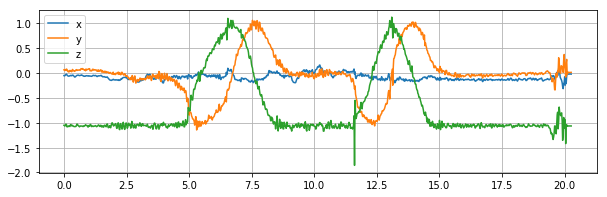

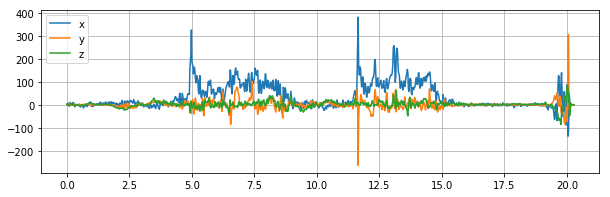

In [8]:
# View plot of data
figsize = (10, 3)


def plot(df, x, y, ax=None):
    """
    Plots the x and y selected from df
    
    Param:
        df: pd.DataFrame()
        x: str/int
        y: str[]/int[]
    """
    # Ensure y is iterable
    if type(y) != type([]):
        y = [y]
    
    if not ax:
        fig, ax = plt.subplots(1, figsize=figsize)
        
    for i in y:
        ax.plot(df[x], df[i])

    ax.legend()
    ax.grid()
    
    plt.show()
    
for v in d.values():
    plot(v['df'], 'elapsed', ['x', 'y', 'z'])

In [9]:
# Not all data will match each other
# We want to ensure the data of accel and gyro match each other
# There is no exact 1-to-1 match
# Instead, we get the closest match


def match_df_shape(dfa, dfg):
    """
    Matches the number of rows of accel dataframe to gyro dataframe
    Allows for 1 extra value in gyroscope dataframe
    Extra row required to eliminate NaN row when calculating elapsed time difference
    
    Param:
        dfa, dfg: pd.DataFrame()
    
    Return:
        dfa, dfg: pd.DataFrame()
    """
    assert type(dfa) == type(pd.DataFrame())
    assert type(dfg) == type(pd.DataFrame())

    # If accel is one less than gyro, return
    if dfa.shape[0] == dfg.shape[0] - 1:
        return dfa, dfg
    else:
        # Ensure accel is at LEAST less than gyro, even if not by one
        assert dfa.shape[0] < dfg.shape[0], 'Unimplemented'
        
        # If so, we assume that the first index of accel is less than the first index of gyro for 'datetime'
        assert dfa['datetime'][0] > dfg['datetime'][0], 'Unimplemented'
        
        if dfa['datetime'][0] > dfg['datetime'][0]:
            diff = dfg['datetime'].apply(lambda x: abs(x - dfa['datetime'][0]))
            
            diff = diff[diff == diff.min()].index
            
            # Ensure only one index containing the closest match between accel and gyro
            assert len(diff) == 1
            
            diff = diff[0] - 1
            
            assert diff > 0
            
            dfg = dfg.loc[diff:, :].reset_index(drop=True)
            
            # Ensure accel and gyro are now differed by one
            assert dfa.shape[0] == dfg.shape[0] - 1
            
            if dfa.shape[0] == dfg.shape[0] - 1:
                return dfa, dfg
        
        
        
#         if df_small[col][0] > df_big[col][0]:
#             diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

#             diff_index = diff[diff == diff.min()].index

#             assert len(diff_index) == 1

#             df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)

#         assert dfa.shape[0] == dfg.shape[0] - 1, 'Unimplemented'


#     else:
#         # Assert that the first value of small is bigger than the first value of bigger in the 'datetime' column
#         assert df_small['datetime'][0] > df_big['datetime'][0], "Unimplemented"

#         if df_small[col][0] > df_big[col][0]:
#             diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

#             diff_index = diff[diff == diff.min()].index

#             assert len(diff_index) == 1

#             df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)


def match_df_shape_X(df1, df2, col, allowed=1):
    """
    
    
    Matches the rows of df1 and df2 to minimise the difference in col
    
    Param:
        df1, df2: pd.DataFrame()
        col: int/str
        allowed: int: allowed difference in size between smaller and larger dataframes
    """
    assert type(df1) == type(pd.DataFrame())
    assert type(df2) == type(pd.DataFrame())

    for df in [df1, df2]:
        try:
            df[col]
        except Exception as e:
            raise e

    if abs(df1.shape[0] - df2.shape[0]) == allowed:
        return df1, df2

    else:
        df_small = df1
        df_big = df2
        invert = False

        if df1.shape[0] > df2.shape[0]:
            invert = True
            df_small = df2
            df_big = df1

        assert df_small[col][0] > df_big[col][0], "Unimplemented"

        if df_small[col][0] > df_big[col][0]:
            diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

            diff_index = diff[diff == diff.min()].index

            assert len(diff_index) == 1

            df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)

        assert df_small.shape == df_big.shape, 'Unimplemented'

        if not invert:
            return df_small, df_big
        else:
            return df_big, df_small


for i in ['a', 'g']:
    d[i]['df']['datetime'] = d[i]['df']['time'].apply(
        lambda x: dt.strptime(x, '%Y-%m-%dT%H:%M:%S.%f'))

d['a']['df'], d['g']['df'] = match_df_shape(d['a']['df'], d['g']['df'])

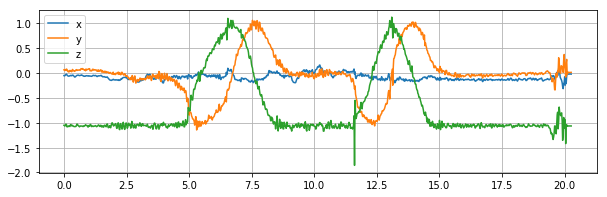

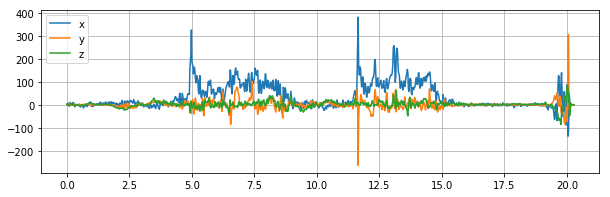

In [10]:
# Ensure data visualisation is still the same, i.e. no mistakes in trimming
for v in d.values():
    plot(v['df'], 'elapsed', ['x', 'y', 'z'])

In [11]:
# Get elapsed difference
d['g']['df']['elapsed_diff'] = d['g']['df']['elapsed'].diff()

# Pop first value
d['g']['df'] = d['g']['df'].loc[1:, :].reset_index(drop=True)

# Get degrees of rotation based on deg/s (x, y, z) multiplied by elapsed time
# Give the answer in radians
for i in ['x', 'y', 'z']:
    d['g']['df']['abs_' + i] = d['g']['df'].apply(lambda x: math.radians(x['elapsed_diff'] * x[i] * -1), axis=1)
#     d['g']['df']['abs_' + i] = d['g']['df'].apply(lambda x: math.radians(x[i]), axis=1)
    
# Get rotation object
d['g']['df']['R'] = d['g']['df'].apply(lambda x: R.from_rotvec([x['abs_' + i] for i in ['x', 'y', 'z']]),axis=1)

In [12]:
d['g']['df']

,epoch,time,elapsed,x,y,z,datetime,elapsed_diff,abs_x,abs_y,abs_z,R
0,1580428069724,2020-01-30T23:47:49.724,0.021,2.424,0.076,-1.021,2020-01-30 23:47:49.724,0.021,-0.000888,-0.000028,0.000374,(((<scipy.spatial.transform.rotation.Rotation ...
1,1580428069744,2020-01-30T23:47:49.744,0.041,5.671,-1.052,-0.183,2020-01-30 23:47:49.744,0.020,-0.001980,0.000367,0.000064,(((<scipy.spatial.transform.rotation.Rotation ...
2,1580428069763,2020-01-30T23:47:49.763,0.060,5.640,0.000,-0.610,2020-01-30 23:47:49.763,0.019,-0.001870,-0.000000,0.000202,(((<scipy.spatial.transform.rotation.Rotation ...
3,1580428069784,2020-01-30T23:47:49.784,0.081,-3.735,3.140,-1.585,2020-01-30 23:47:49.784,0.021,0.001369,-0.001151,0.000581,(((<scipy.spatial.transform.rotation.Rotation ...
4,1580428069804,2020-01-30T23:47:49.804,0.101,-7.119,3.110,-0.838,2020-01-30 23:47:49.804,0.020,0.002485,-0.001086,0.000293,(((<scipy.spatial.transform.rotation.Rotation ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1580428089907,2020-01-30T23:48:09.907,20.204,-0.884,-0.701,-0.290,2020-01-30 23:48:09.907,0.021,0.000324,0.000257,0.000106,(((<scipy.spatial.transform.rotation.Rotation ...
1006,1580428089926,2020-01-30T23:48:09.926,20.223,-0.625,-0.610,-0.366,2020-01-30 23:48:09.926,0.019,0.000207,0.000202,0.000121,(((<scipy.spatial.transform.rotation.Rotation ...
1007,1580428089946,2020-01-30T23:48:09.946,20.243,-0.549,-0.655,-0.351,2020-01-30 23:48:09.946,0.020,0.000192,0.000229,0.000123,(((<scipy.spatial.transform.rotation.Rotation ...
1008,1580428089967,2020-01-30T23:48:09.967,20.264,-0.625,-0.655,-0.366,2020-01-30 23:48:09.967,0.021,0.000229,0.000240,0.000134,(((<scipy.spatial.transform.rotation.Rotation ...


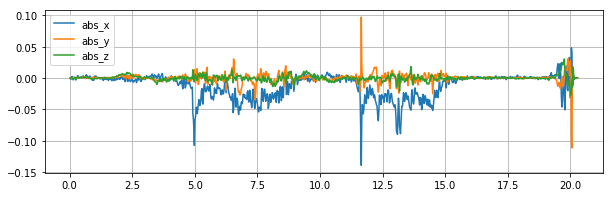

In [13]:
# Plot absolute rotation
plot(d['g']['df'], 'elapsed', ['abs_' + i for i in ['x', 'y', 'z']])

In [14]:
# Apply rotation
# Extract xyz
xyz = d['a']['df'].apply(lambda x: [x[i] for i in ['x', 'y', 'z']], axis=1).to_list()

for i in tqdm(range(d['a']['df'].shape[0])):
    rotator = d['g']['df'].loc[i, 'R']
    
    for j in range(i, d['a']['df'].shape[0]):        
        xyz[j] = rotator.apply(xyz[j], inverse=True)
        
#         print(i, j)
    
#     xyz.append(d['g']['df'].loc[i,
#                                 'R'].apply(d['a']['df'].loc[i,
#                                                             ['x', 'y', 'z']].to_list(), inverse=True))

#     xyz.append(d['a']['df'].loc[i, ['x', 'y', 'z']].to_list())
#     xyz[-1] = d['g']['df'].loc[i, 'R'].apply(xyz[-1], inverse=True)

xyz = pd.DataFrame(xyz, columns=['x', 'y', 'z'])

for i in ['x', 'y', 'z']:
    d['a']['df']['actual_' + i] = xyz[i]

In [15]:
d['a']['df']

,epoch,time,elapsed,x,y,z,datetime,actual_x,actual_y,actual_z
0,1580428069724,2020-01-30T23:47:49.724,0.000,-0.059,0.058,-1.054,2020-01-30 23:47:49.724,-0.059007,0.058958,-1.053946
1,1580428069744,2020-01-30T23:47:49.744,0.020,-0.064,0.045,-1.062,2020-01-30 23:47:49.744,-0.063620,0.048074,-1.061888
2,1580428069763,2020-01-30T23:47:49.763,0.039,-0.059,0.054,-1.070,2020-01-30 23:47:49.763,-0.058601,0.059107,-1.069752
3,1580428069784,2020-01-30T23:47:49.784,0.060,-0.046,0.063,-1.054,2020-01-30 23:47:49.784,-0.046774,0.066607,-1.053744
4,1580428069804,2020-01-30T23:47:49.804,0.080,-0.035,0.045,-1.030,2020-01-30 23:47:49.804,-0.036881,0.045964,-1.029892
...,...,...,...,...,...,...,...,...,...,...
1005,1580428089907,2020-01-30T23:48:09.907,20.183,-0.028,0.006,-1.067,2020-01-30 23:48:09.907,0.491307,0.058392,-0.945789
1006,1580428089926,2020-01-30T23:48:09.926,20.202,-0.025,0.007,-1.067,2020-01-30 23:48:09.926,0.493769,0.059871,-0.944336
1007,1580428089946,2020-01-30T23:48:09.946,20.222,-0.024,0.006,-1.067,2020-01-30 23:48:09.946,0.495081,0.058921,-0.943676
1008,1580428089967,2020-01-30T23:48:09.967,20.243,-0.028,0.006,-1.068,2020-01-30 23:48:09.967,0.492448,0.057667,-0.946369


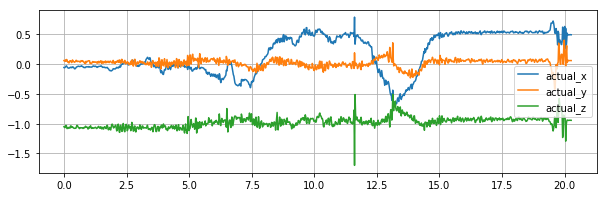

In [16]:
plot(d['a']['df'], 'elapsed', ['actual_' + i for i in ['x', 'y', 'z']])

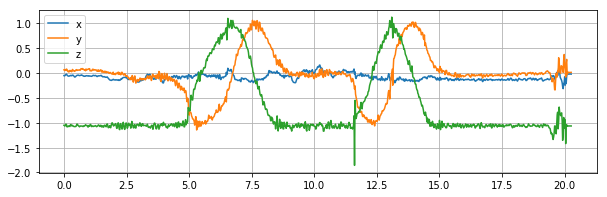

In [17]:
plot(d['a']['df'], 'elapsed', [i for i in ['x', 'y', 'z']])

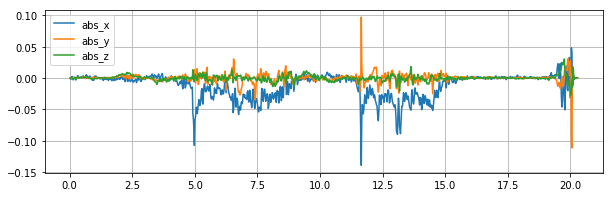

In [18]:
# Plot absolute rotation
plot(d['g']['df'], 'elapsed', ['abs_' + i for i in ['x', 'y', 'z']])

In [19]:
d['a']['df'].loc[:, 'actual_z'] = d['a']['df'].loc[:, 'actual_z'].apply(lambda x: x + 1)

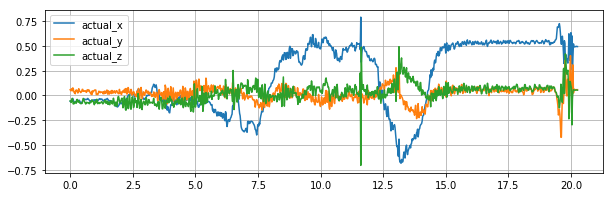

In [20]:
plot(d['a']['df'], 'elapsed', ['actual_' + i for i in ['x', 'y', 'z']])